#GNN Explainer - Loan-Datensatz

Paper: Ying, Zhitao, et al. "Gnnexplainer: Generating explanations for graph neural networks." Advances in neural information processing systems 32 (2019).

## Packages Installieren

In [1]:
%%capture
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-geometric==1.7.2

In [2]:
%%capture
!pip install dive-into-graphs

In [3]:
# !git clone https://github.com/divelab/DIG.git
# %cd DIG
# !pip install .

In [4]:
%%capture
!pip install pm4py

In [5]:
# Hauptordner-Pfad
import torch
from pathlib import Path
path = Path("/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM")
%cd "/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM" 

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM


In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import torch
import joblib

# Module für das Preprocessing der verwendeten Datensätze
from preprocessing.loanApplication import *
from preprocessing.reviewSynthetic import *

from models.gcn3_neu import *

from utilities_pgexplainer_tuning import split_dataset_2_8, visual_tuning_results
from train_gcn import load_gcn_key, load_gcn
from utilities_gnnexplainer_tuning import run_tuning
from dig.xgraph.method import GNNExplainer
from dig.xgraph.evaluation import XCollector, ExplanationProcessor
from utilities_preprocessing import GraphDatasetHelper



In [8]:
# Verwendete Laufzeit-Umgebung definieren (GPU oder CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Datensatz laden 

### Loan - Aktivität

In [ ]:
# Laden eines Vorverarbeiteten Datensatzes
dataset_name = "loan_sn_f2_ohe_wEvents_4_nreb" # "review_sn_f3_ohe_2"  loan_sn_f2_ohe_wEvents_4
dataset = torch.load(path / str("datasets/dataset_" + dataset_name))
feature  = joblib.load("datasets/encoder_" + dataset_name + ".joblib") 
input_dim = dataset.num_features

ds_train, ds_test = split_dataset_2_8(dataset)

### Loan - Event

In [9]:
# Laden eines Vorverarbeiteten Datensatzes
dataset_name = "loan_all_events_fall_ohe_wEvents_5_2"
dataset = torch.load(path / str("datasets/dataset_" + dataset_name))
feature  = joblib.load("datasets/encoder_" + dataset_name + ".joblib") 


##Variablen

Hier sind alle Variablen zusammengefasst. Vor Ausführen der Datei können hier Konfigurationen vorgenommen werden

In [ ]:

# ---------------------------Trainingsdatensatz ------------------------
test_len = 50

# ---------------------------Variablen Model---------------------------
hidden_channel = 100

path_model = path / "models/"
model_name = "model_" + dataset_name

# ---------------------------Variablen XAI Methoden---------------------------
sparsity = 0.7    # Spärlichkeit: Wie viel Prozent des ursprünglichen Graphen aus der Erklärung ausgeschlossen werden soll
num_classes =  dataset.num_classes  # Anzahl der Klassen: 0: Review wurde angenommen, 1: Review wurde abgelehnt



## Visualisierung

In [ ]:
data  = fast_test[1]

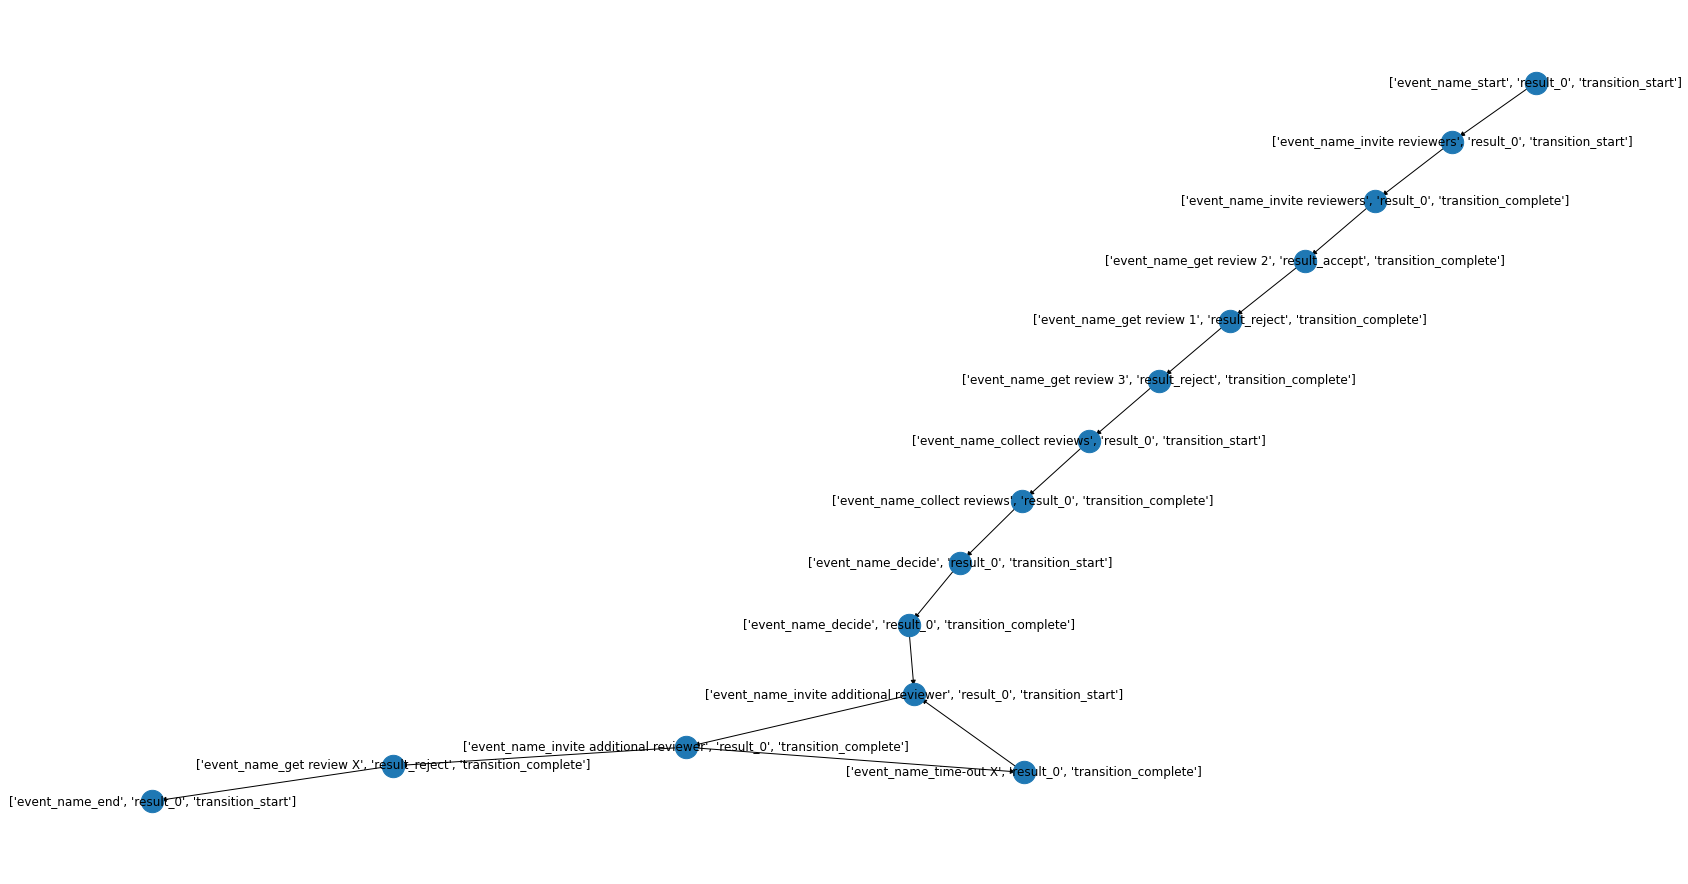

In [ ]:

# Namen können nur bei label encoder angezeigt werden
helper = GraphDatasetHelper(node_feature = feature)
helper.visualise_dataset(data)

## Tuning Review Datensatz

### Aktivtäten-basiert


In [ ]:
dataset_name

'loan_sn_f2_ohe_wEvents_4_nreb'

In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 100
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [01:25<00:00,  1.18it/s]


Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650131558_0.05 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.28468558192253113, Fidelity-: 0.29830771684646606, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 200
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [02:41<00:00,  1.62s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650131644_0.05 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.2766144871711731, Fidelity-: 0.34160465002059937, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 300
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:00<00:00,  2.41s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650131806_0.05 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.31889817118644714, Fidelity-: 0.296983003616333, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:20<00:00,  3.20s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650132046_0.05 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.19141696393489838, Fidelity-: 0.27881133556365967, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 500
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:40<00:00,  4.00s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650132366_0.05 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.2549273371696472, Fidelity-: 0.3340342044830322, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.01,
    "sparsity_ziel": 0.7,
    "epochs": 300
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.01--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:01<00:00,  2.41s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650132767_0.01 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.24772971868515015, Fidelity-: 0.32203975319862366, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.01,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.01--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:19<00:00,  3.20s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650133008_0.01 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.21937377750873566, Fidelity-: 0.3331165611743927, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.01,
    "sparsity_ziel": 0.7,
    "epochs": 500
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.01--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:38<00:00,  3.99s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650133328_0.01 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.27127692103385925, Fidelity-: 0.30271539092063904, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:19<00:00,  3.19s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650133727_0.001 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.2197771966457367, Fidelity-: 0.3346046209335327, Sparsity: 0.7171217203140259
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn(dataset_name, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, dataset_name)


-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:19<00:00,  3.19s/it]

Saved: /content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/xai_methods/gnnexplainer/tuning/loan_sn_f2_ohe_wEvents_4_nreb/1650134046_0.005 _loan_sn_f2_ohe_wEvents_4_nreb
Fidelity+: 0.17138983309268951, Fidelity-: 0.3313891887664795, Sparsity: 0.7171217203140259
save Hyperparameter


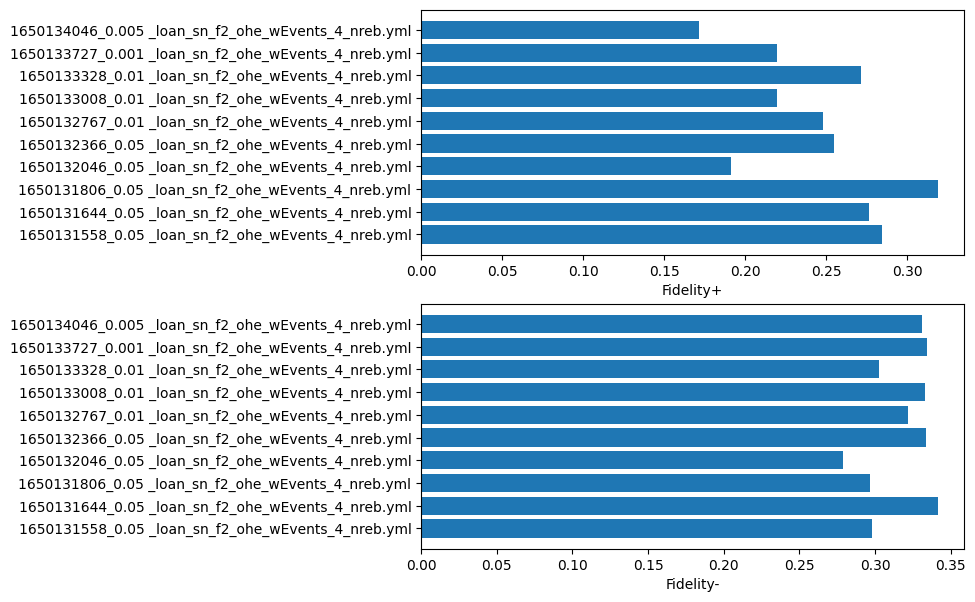

In [ ]:
visual_tuning_results(f"{dataset_name}", path, True)

### Event basiert
-> loan_all_events_fall_ohe_wEvents_5_2

In [ ]:
dataset_name

'loan_all_events_fall_ohe_wEvents_5_2'

In [ ]:
# Dataset und Model
key = 0
dataset0 = dataset[key]
input_dim = dataset0[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset0)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:24<00:00,  3.24s/it]


Fidelity+: 0.24412524700164795, Fidelity-: 0.0679113119840622, Sparsity: 0.7133089303970337
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:04<00:00,  2.45s/it]

Fidelity+: 0.2122054249048233, Fidelity-: 0.08837737143039703, Sparsity: 0.7133089303970337
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:46<00:00,  4.07s/it]

Fidelity+: 0.24919848144054413, Fidelity-: 0.05839097499847412, Sparsity: 0.7133089303970337
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.7,
    "epochs": 600
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [08:05<00:00,  4.85s/it]

Fidelity+: 0.30080270767211914, Fidelity-: 0.07085317373275757, Sparsity: 0.7133089303970337
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:20<00:00,  3.21s/it]

Fidelity+: 0.06943455338478088, Fidelity-: 0.11267273873090744, Sparsity: 0.7133089303970337
save Hyperparameter


In [ ]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.7,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:23<00:00,  3.24s/it]

Fidelity+: 0.04408973827958107, Fidelity-: 0.13305024802684784, Sparsity: 0.7133089303970337
save Hyperparameter


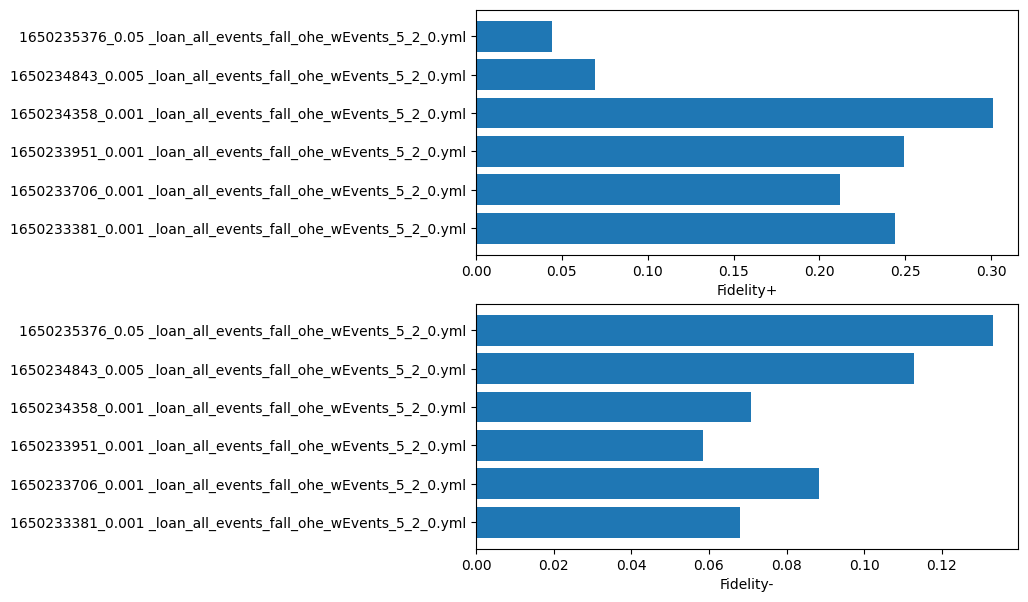

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

###Präfixe
-> review_all_events_f5_ohe_2_prefix

#### Länge 4

In [22]:
dataset_name

'loan_all_events_fall_ohe_wEvents_5_2'

In [23]:
# Dataset und Model
key = 4
dataset4 = dataset[key]
input_dim = dataset4[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset4)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:20<00:00,  3.21s/it]


Fidelity+: 0.008535142987966537, Fidelity-: 0.01250125840306282, Sparsity: 0.714285671710968
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:01<00:00,  2.42s/it]

Fidelity+: 0.008767951279878616, Fidelity-: 0.013833362609148026, Sparsity: 0.714285671710968
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:40<00:00,  4.00s/it]

Fidelity+: 0.008858305402100086, Fidelity-: 0.013493862003087997, Sparsity: 0.714285671710968
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:20<00:00,  3.21s/it]

Fidelity+: 0.012369551695883274, Fidelity-: 0.013182231225073338, Sparsity: 0.714285671710968
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:40<00:00,  4.00s/it]

Fidelity+: 0.014846928417682648, Fidelity-: 0.012100708670914173, Sparsity: 0.714285671710968
save Hyperparameter


In [24]:
param = {
    "lr": 0.0001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.0001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:55<00:00,  4.15s/it]


Fidelity+: 0.008948352187871933, Fidelity-: 0.014032799750566483, Sparsity: 0.714285671710968
save Hyperparameter


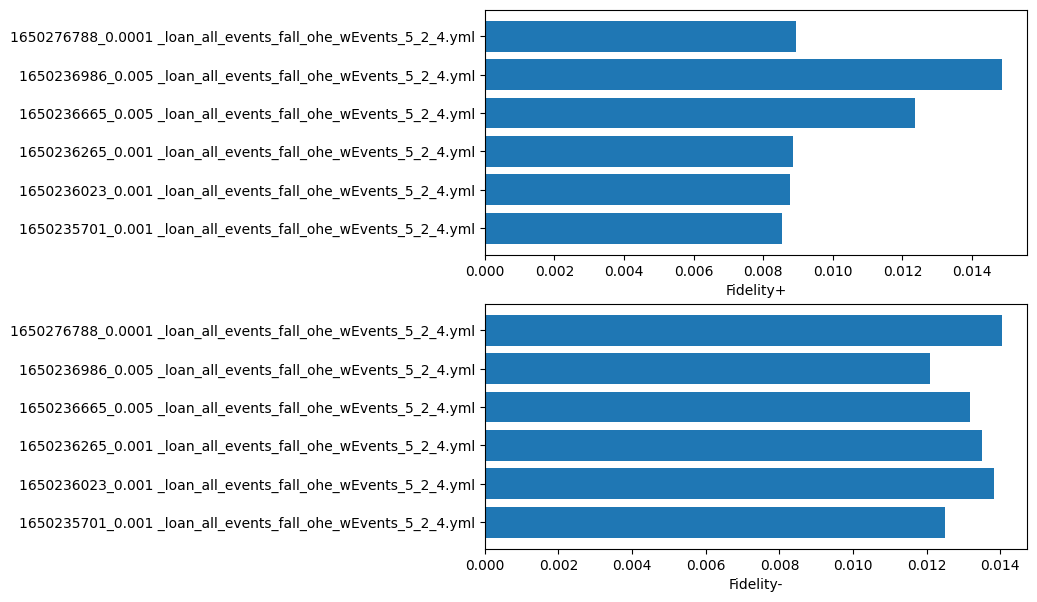

In [25]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 7

In [ ]:
dataset_name

'loan_all_events_fall_ohe_wEvents_5_2'

In [ ]:
# Dataset und Model
key = 7
dataset7 = dataset[key]
input_dim = dataset7[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset7)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [05:22<00:00,  3.22s/it]


Fidelity+: 0.020688269287347794, Fidelity-: 0.016868548467755318, Sparsity: 0.6153845191001892
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [04:02<00:00,  2.42s/it]

Fidelity+: 0.020786648616194725, Fidelity-: 0.0117073655128479, Sparsity: 0.6153845191001892
save Hyperparameter


In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:40<00:00,  4.01s/it]

Fidelity+: 0.02822771482169628, Fidelity-: 0.009077532216906548, Sparsity: 0.6153845191001892
save Hyperparameter


In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.005--------------
GNNExplainer anwenden


100%|██████████| 100/100 [06:41<00:00,  4.01s/it]

Fidelity+: 0.025162195786833763, Fidelity-: 0.012936761602759361, Sparsity: 0.6153845191001892
save Hyperparameter


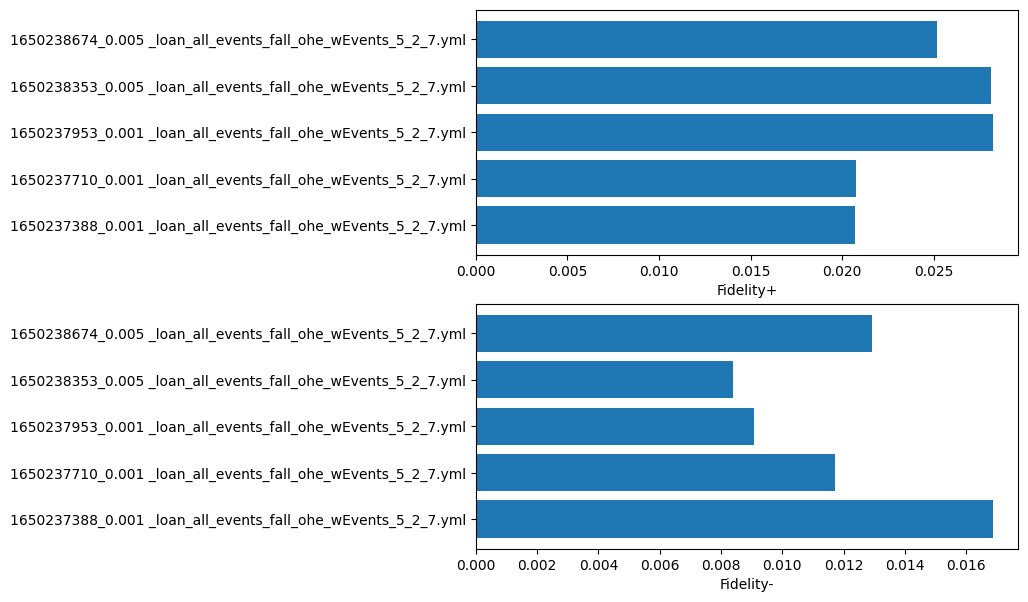

In [ ]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 10

In [19]:
dataset_name

'loan_all_events_fall_ohe_wEvents_5_2'

In [20]:
# Dataset und Model
key = 10
datase10  = dataset[key]
input_dim = datase10[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(datase10)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

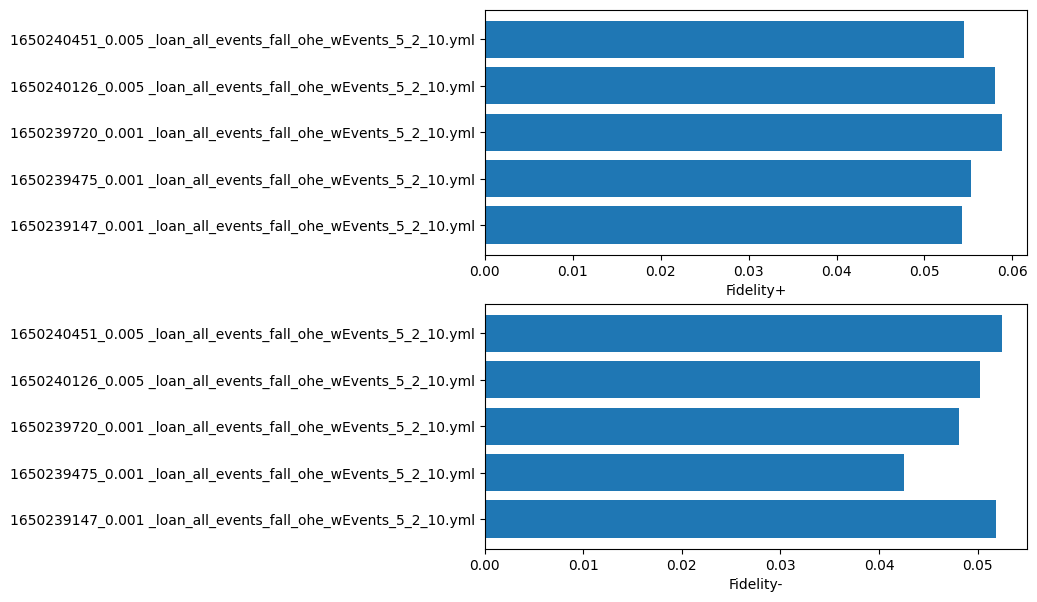

In [21]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 13

In [10]:
dataset_name

'loan_all_events_fall_ohe_wEvents_5_2'

In [11]:
# Dataset und Model
key = 13
dataset13 = dataset[key]
input_dim = dataset13[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset13)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
     "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

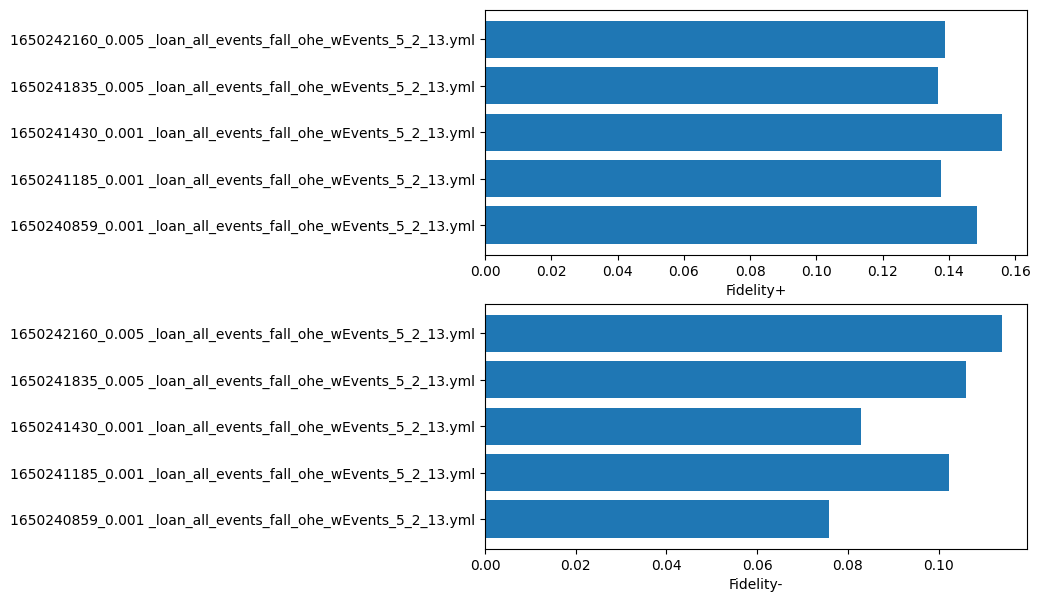

In [12]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 16

In [13]:
dataset_name

'loan_all_events_fall_ohe_wEvents_5_2'

In [14]:
# Dataset und Model
key = 16
dataset16 = dataset[key]
input_dim = dataset16[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset16)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

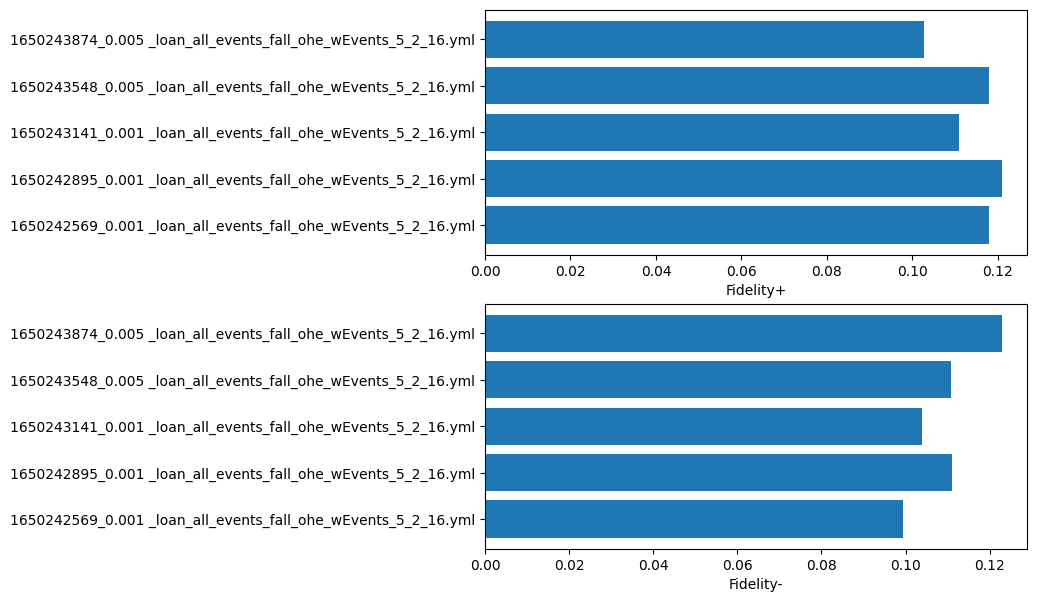

In [15]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)

####Länge 19

In [27]:
dataset_name

'loan_all_events_fall_ohe_wEvents_5_2'

In [28]:
# Dataset und Model
key = 19
dataset19 = dataset[key]
input_dim = dataset19[0].x.shape[1]

# split
ds_train, ds_test = split_dataset_2_8(dataset19)

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 300
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 400
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [ ]:
param = {
    "lr": 0.005,
    "sparsity_ziel": 0.6,
    "epochs": 500
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

In [30]:
param = {
    "lr": 0.001,
    "sparsity_ziel": 0.6,
    "epochs": 200
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.001--------------
GNNExplainer anwenden


100%|██████████| 100/100 [02:45<00:00,  1.65s/it]

Fidelity+: 0.14486059546470642, Fidelity-: 0.17049425840377808, Sparsity: 0.6216215491294861
save Hyperparameter


In [31]:
param = {
    "lr": 0.05,
    "sparsity_ziel": 0.6,
    "epochs": 200
}
model = load_gcn_key(dataset_name, key, input_dim, device, path)
result_col = run_tuning(param, model, ds_test[:100], device, path, f"{dataset_name}_{key}")

-------------Learning Rate: 0.05--------------
GNNExplainer anwenden


100%|██████████| 100/100 [02:46<00:00,  1.66s/it]

Fidelity+: 0.12306975573301315, Fidelity-: 0.16498899459838867, Sparsity: 0.6216215491294861
save Hyperparameter


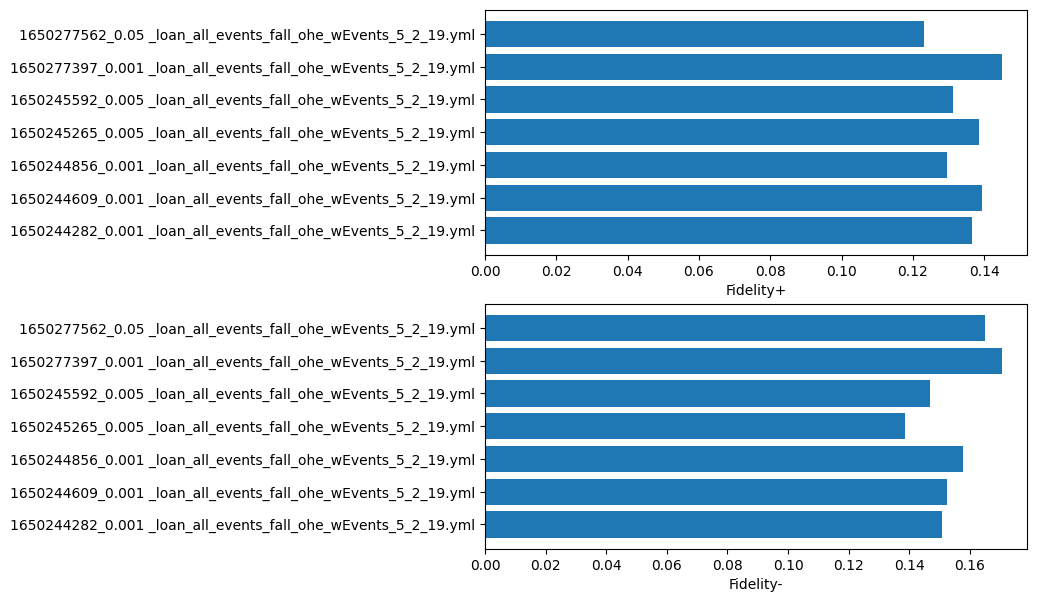

In [32]:
visual_tuning_results(f"{dataset_name}_{key}", path, True)